# AlexNet

Implementing **ImageNet Classification with Deep Convolutional Neural Networks**  
by **Alex Krizhevsky** , **Ilya Sutskever**, **Geoffery Hinton**

paper - [link](https://papers.nips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf)  
helpful resources - [medium article](https://medium.com/@siddheshb008/alexnet-architecture-explained-b6240c528bd5)


AlexNet consists of

- 5 convolution layers,
- 3 max-pooling layers,
- 2 Normalized layers,
- 2 fully connected layers and
- 1 SoftMax layer.
- ReLU activation function


In [12]:
import torch
from torch import nn
from tqdm.auto import tqdm
import torchvision

## Model architecture
via : Medium


![image.png](attachment:image.png)

## Getting dataset

In [1]:
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

In [2]:
data_tansform = transforms.Compose([
    transforms.Resize(size=(227,227)),
    transforms.ToTensor()
])

In [3]:
# setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download to
    train=True, # training true , test false
    download=True,
    transform=data_tansform, # how do we want to transform the data
    target_transform=None # how do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root="data", # where to download to
    train=False, # training true , test false
    download=True,
    transform=data_tansform, # how do we want to transform the data
    target_transform=None # how do we want to transform the labels/targets
)



In [4]:

len(train_data), len(test_data)

(60000, 10000)

In [5]:

class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

Image shape : torch.Size([1, 227, 227])


Text(0.5, 1.0, '9')

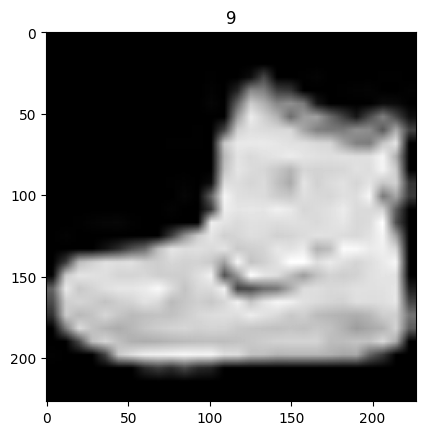

In [7]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape : {image.shape}")
plt.imshow(image.squeeze(), cmap='gray') # getting rid of 1 color channel. grayscale
plt.title(label)

In [8]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(227, 227), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [9]:


from torch.utils.data import DataLoader

#hyperparameter
BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_data, batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data, batch_size=BATCH_SIZE,
    shuffle=False
)

train_dataloader, test_dataloader



(<torch.utils.data.dataloader.DataLoader at 0x795830c5f8b0>,
 <torch.utils.data.dataloader.DataLoader at 0x7958f767ec80>)

In [10]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape ,train_labels_batch.shape

(torch.Size([32, 1, 227, 227]), torch.Size([32]))

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [13]:
class AlexNet(nn.Module):
    def __init__(self):
        super().__init__()


        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=96, kernel_size=11, stride=4),
            nn.ReLU(),
            nn.BatchNorm2d(96),
            nn.MaxPool2d(kernel_size=3, stride=2),

        )
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.block3 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(384),

            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(384),

            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.fc1 = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.5),
            nn.Linear(in_features=9216, out_features=4096),
            nn.ReLU()
        )
        self.fc2 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU()
        )
        self.fc3 = nn.Sequential(
            nn.Linear(in_features=4096, out_features=1000),
            nn.ReLU()
        )
        self.fc4 = nn.Sequential(
            nn.Linear(in_features=1000, out_features=len(class_names)),
            nn.Softmax()
        )

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        # print(x.shape)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)



        return x





In [14]:
model = AlexNet()

In [13]:
! pip install torchinfo

In [14]:
from torchinfo import summary
summary(model, input_size=[1,1,227,227])

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1553: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  [1, 10]                   --
├─Sequential: 1-1                        [1, 96, 27, 27]           --
│    └─Conv2d: 2-1                       [1, 96, 55, 55]           11,712
│    └─ReLU: 2-2                         [1, 96, 55, 55]           --
│    └─BatchNorm2d: 2-3                  [1, 96, 55, 55]           192
│    └─MaxPool2d: 2-4                    [1, 96, 27, 27]           --
├─Sequential: 1-2                        [1, 256, 13, 13]          --
│    └─Conv2d: 2-5                       [1, 256, 27, 27]          614,656
│    └─ReLU: 2-6                         [1, 256, 27, 27]          --
│    └─BatchNorm2d: 2-7                  [1, 256, 27, 27]          512
│    └─MaxPool2d: 2-8                    [1, 256, 13, 13]          --
├─Sequential: 1-3                        [1, 256, 6, 6]            --
│    └─Conv2d: 2-9                       [1, 384, 13, 13]          885,120

In [19]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [23]:
image , label = train_data[4]
image = image.unsqueeze(0)
# image = image.to(device)
image.shape, label

(torch.Size([1, 1, 227, 227]), 0)

In [24]:
model(image).to(device)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1553: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor([[0.1077, 0.0892, 0.1164, 0.0593, 0.1211, 0.1052, 0.1010, 0.1108, 0.1019,
         0.0873]], device='cuda:0', grad_fn=<ToCopyBackward0>)

In [25]:
model(image).to(device).argmax()

tensor(2, device='cuda:0')

## Writing Train and test step

In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [18]:
device

'cuda'

In [106]:
for (X,y) in enumerate(train_dataloader):
  print(X, y)
  break

0 [tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ...,

In [26]:
def train_step(model:torch.nn.Module,
              dataloader : torch.utils.data.DataLoader,
               loss_fn : nn.Module,
               optimizer : torch.optim.Optimizer,
               device = device
              ):

    model.train()
    train_loss = 0

    # add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader): # X - features , y - labels
      X,y = X.to(device) , y.to(device)

      # 1. forward pass
      y_pred = model(X)

      #2. calculate loss (per batch)
      loss = loss_fn(y_pred, y)
      print(loss)
      train_loss += loss  # accumulate train loss

      # optimize zero grad
      optimizer.zero_grad()

      # loss backward
      loss.backward()

      # optimizer step
      optimizer.step()
    train_loss /= len(dataloader)
    print('train loss : ', train_loss)
    return train_loss

In [30]:
def test_step(model:nn.Module,
             dataloader:torch.utils.data.DataLoader,
             loss_fn : nn.Module,
             device=device):
    test_loss = 0
    model.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X,y = X.to(device) , y.to(device)
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            test_loss += loss.item()
    test_loss /= len(dataloader)
    return test_loss

In [31]:
from tqdm.auto import tqdm
def train(model:torch.nn.Module,
          train_datalaoder : torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn : torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int =5,
          device=device):

  results= {
      "train_loss" : [],
      # "train_acc" : [],
      "test_loss" : [],
      # "test_acc" : []
  }

  for epoch in tqdm(range(epochs)):
    train_loss = train_step(model=model,
                                       dataloader=train_dataloader,
                                       optimizer=optimizer,
                                       loss_fn=loss_fn,
                                       device=device)

    test_loss = test_step(model=model,
                                       dataloader=test_dataloader,
                                       loss_fn=loss_fn,
                                       device=device)

    print(f"Epoch {epoch} | Train loss : {train_loss:.4f} | Test loss : {test_loss:.4f}  ")

    results["train_loss"].append(train_loss)
    # results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    # results["test_acc"].append(test_acc)

  return results

In [32]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 2

model = AlexNet()
model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

from timeit import default_timer as timer
start_time = timer()

model_results = train(model=model, train_datalaoder=train_dataloader,
                        test_dataloader=test_dataloader, loss_fn=loss_fn,
                        optimizer=optimizer, epochs=NUM_EPOCHS,
                        )

end_time = timer()

  0%|          | 0/2 [00:00<?, ?it/s]

tensor(2.3018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.3024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.3049, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.2984, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.3015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.3003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.2997, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.3021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.3018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.2970, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.3029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.3019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.2961, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.2971, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.3004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.3020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.2969, device='cuda:0', grad_fn=